In [66]:
import pandas as pd
import seaborn as sns
import numpy as np

import sys
wd = '/local_scratch.old/zabel/tsne/diss'
sys.path.insert(0, wd)

In [67]:
d = pd.read_csv(wd + '/datasets/Thcells/GSE2770_GPL97.txt', sep='\t', header=0, index_col=0)
d = np.log(d+1)

In [68]:
d.head()

,Thp_0h_rep1,Th2+TGFbeta_2h_rep1,Th2+TGFbeta_6h_rep1,Th0_2h_rep1,Th0_6h_rep1,Th1_2h_rep1,Th1_6h_rep1,Th1+TGFbeta_2h_rep1,Th1+TGFbeta_6h_rep1,Th2_2h_rep1,...,Th1+TGFbeta_6h_rep2,Th2_6h_rep2,Th2+TGFbeta_6h_rep2,Th0_2h_rep2,Th0_6h_rep2,Th1_6h_rep2,Th1+TGFbeta_2h_rep2,Th2_2h_rep2,Th2+TGFbeta_2h_rep2,Th1_2h_rep2
ID_REF,,,,,,,,,,,,,,,,,,,,,
200000_s_at,6.302069,6.357149,6.808377,6.487380,6.703065,6.544056,6.512488,6.553791,6.790210,6.433904,...,7.227227,7.094401,6.842150,7.055658,7.163250,7.130179,6.914830,6.994942,6.957973,7.002975
200001_at,6.448731,5.065123,5.210578,6.214408,5.156178,6.254021,4.811371,5.833055,5.567581,5.353752,...,6.260919,6.412967,5.829828,5.908083,6.105463,6.028038,5.967684,5.922382,5.777652,5.780126
200002_at,8.615644,8.471107,8.660271,8.684976,8.638525,8.702577,8.334376,8.655476,8.610629,8.629789,...,8.999385,8.986321,8.765989,9.003624,9.034414,8.962558,8.822676,8.851434,8.896150,8.877842
200003_s_at,8.993017,8.881975,8.739456,9.097440,8.768792,9.069502,8.486940,8.996367,8.788959,8.962379,...,8.955190,9.025708,8.671818,9.190546,9.069422,8.926610,8.923644,8.990840,9.105469,9.041649
200004_at,7.385851,8.162145,8.047542,8.031288,7.914106,8.184988,7.658841,8.165449,7.952756,8.178583,...,7.953002,7.796839,7.783266,8.223198,7.842043,7.834749,8.138536,8.084994,8.061392,8.064542


In [ ]:
sns.boxplot(d)

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7ff65bc03ce0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
rank_mean = d.stack().groupby(d.rank(method='first').stack().astype(int)).mean()
d_norm = d.rank(method='min').stack().astype(int).map(rank_mean).unstack()


<Axes: >

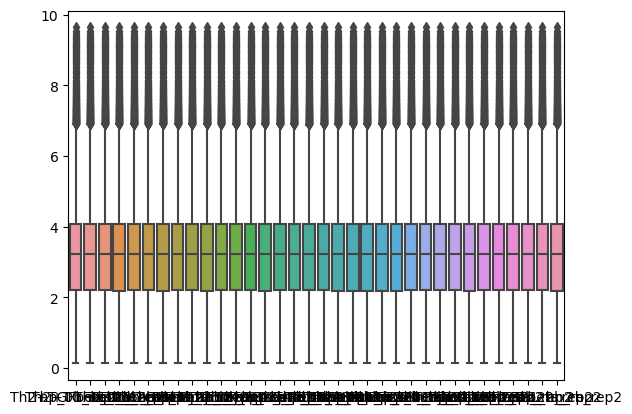

In [ ]:
sns.boxplot(d_norm)

In [ ]:
pd.DataFrame.to_csv(d_norm.T, 'Thcells/datasets/GSE2770_GPL97_log_qnorm.txt', sep='\t')

In [1]:
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps

import sys
wd = '/local_scratch.old/zabel/tsne/diss'
sys.path.insert(0, wd)

import pandas as pd
import seaborn as sns

from tsne_jax import *

from utils import MidpointNormalize, load_data
import matplotlib.pyplot as plt
#import tikzplotlib
import jax

from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(fontsizes.aistats2022())
plt.rcParams['axes.grid'] = False

### Load matrices generated in R

In [2]:
selected_data = pd.read_csv(wd + '/datasets/Thcells/selected_data.txt')
selected_data = selected_data.values
labels = pd.read_csv(wd + '/datasets/Thcells/labels.txt', header=None)
labels = labels.values.flatten().tolist()

labels_time = pd.read_csv(wd + '/datasets/Thcells/labels_time.txt', header=None)
labels_time = labels_time.values.flatten().tolist()

labels_type = pd.read_csv(wd + '/datasets/Thcells/labels_type.txt', header=None)
labels_type = labels_type.values.flatten().tolist()

key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)


===> Finding 33 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.5580, 50 iterations in 1.4567 sec
Iteration  100, KL divergence 0.5164, 50 iterations in 1.3690 sec
Iteration  150, KL divergence 0.5405, 50 iterations in 0.7867 sec
Iteration  200, KL divergence 0.4640, 50 iterations in 0.7853 sec
Iteration  250, KL divergence 0.5775, 50 iterations in 0.7831 sec
   --> Time elapsed: 5.18 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.0032, 50 iterations in 0.9210 sec
Iteration  100, KL divergence 0.0017, 50 iterations in 0.7843 sec
Iteration  150, KL divergence 0.0017, 50 iterations in 0.7845 sec
Iteration  200, KL divergence 0.0017, 50 iterations in 0.7852 sec
Iteration 

In [3]:
mean = pd.read_csv(wd + '/datasets/Thcells/mean.txt')
cov1 = pd.read_csv(wd + '/datasets/Thcells/cov1.txt')
N = np.array(cov1.values)
cov2 = pd.read_csv(wd + '/datasets/Thcells/cov2.txt')
D = np.array(cov2.values)
print(mean.shape, cov1.shape, cov2.shape)


(17, 50) (17, 17) (50, 50)


In [4]:
import scipy
from utils import load_data
X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
#X, y = load_data(10)
key = random.PRNGKey(40)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


Perplexity value 30 is too high. Using perplexity 5.33 instead


===> Finding 16 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.1572, 50 iterations in 1.2543 sec
Iteration  100, KL divergence 1.7874, 50 iterations in 0.9823 sec
Iteration  150, KL divergence 1.7126, 50 iterations in 0.8196 sec
Iteration  200, KL divergence 1.3196, 50 iterations in 0.8852 sec
Iteration  250, KL divergence 1.6194, 50 iterations in 0.9558 sec
   --> Time elapsed: 4.90 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.4323, 50 iterations in 0.8253 sec
Iteration  100, KL divergence 0.2392, 50 iterations in 0.8069 sec
Iteration  150, KL divergence 0.2328, 50 iterations in 0.8115 sec
Iteration  200, KL divergence 0.0790, 50 iterations in 0.8281 sec
Iteration 

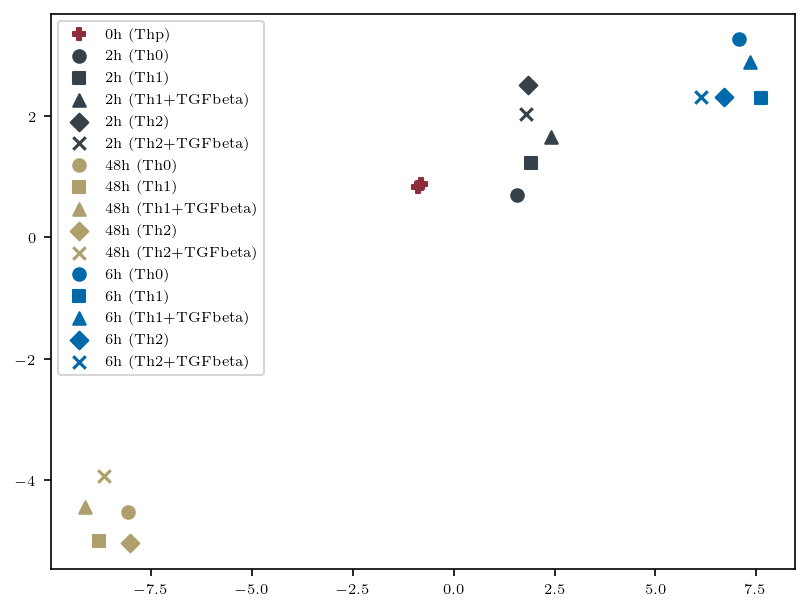

In [5]:
import itertools
import matplotlib
# Define a set of different markers
import numpy as np
marker_list = ['o', 's', '^', 'D', 'x', 'P', '*', 'v', 'p', 'H']  # Extendable list of marker styles

# Get unique types and assign markers dynamically
unique_types = np.unique(np.array(labels_type))
marker_styles = {t: m for t, m in zip(unique_types, itertools.cycle(marker_list))}

# Assign unique colors to time labels
unique_times = np.unique(labels_time)
colors = palettes.tue_plot #matplotlib.colormaps.get_cmap('tab10')  # Using tab10 colormap
color_map = {t: colors[i] for i, t in enumerate(unique_times)}

fig, ax = plt.subplots()

for g in unique_times:  # Loop over time labels
    for t in unique_types:  # Loop over type labels
        ix = np.where((np.array(labels_time) == g) & (np.array(labels_type) == t))
        if len(ix[0]) > 0:  # Ensure there are points to plot
            ax.scatter(Y_star[ix, 0], Y_star[ix, 1], 
                       label=f"{g} ({t})", 
                       marker=marker_styles[t], 
                       color=color_map[g])
ax.legend()
#plt.show()

#scatter = plt.scatter(*Y_star.T, cmap = 'tab20', label=labels_time)
#plt.legend(handles=scatter.legend_elements(num=17)[0], labels=labels_time)
#plt.legend(handles=scatter.legend_elements()[0], labels=labels)
#plt.legend(labels)

In [6]:
import jax.numpy as np
dy_dx = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 5.33)

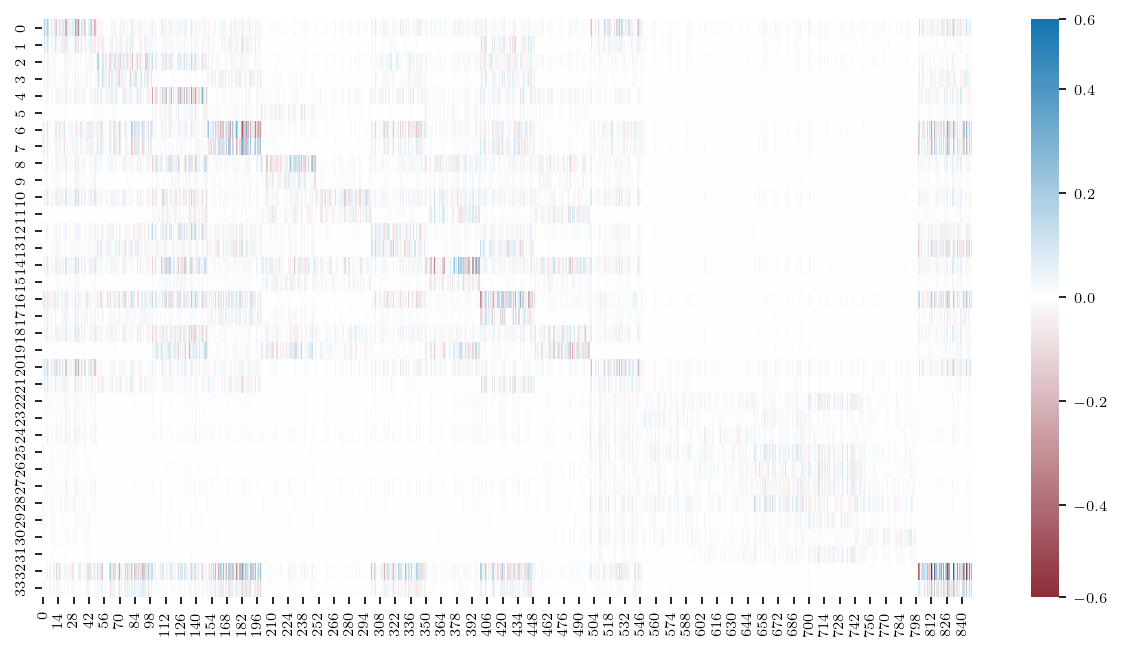

In [16]:
from utils import plot_heatmap
import numpy as np
plot_heatmap(dy_dx, figsize=(10, 5), outfile=wd + '/datasets/Thcells/sensitivities.pdf', with_cell_lines=False)

<Axes: >

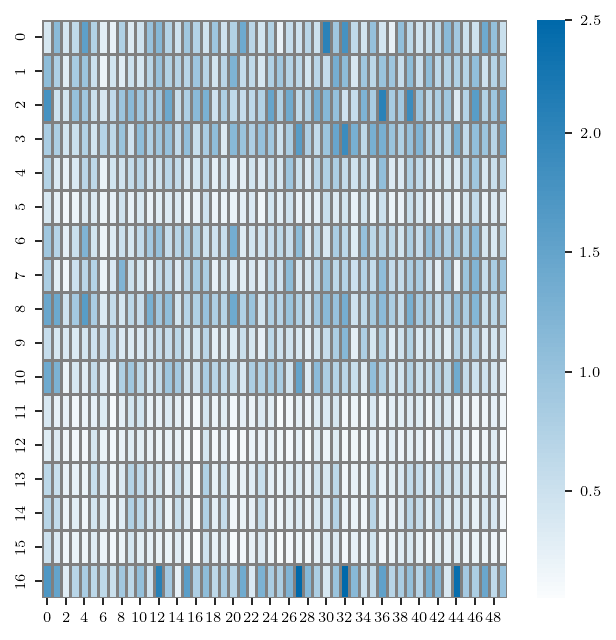

In [24]:
dy_dx_per_input = np.sum(np.abs(dy_dx), axis=0)
#f = plt.figure()
#plt.plot(np.sum(np.abs(dy_dx), axis=0))
dy_dx_per_input_reshaped = X_unflattener(dy_dx_per_input)
plot_heatmap(dy_dx_per_input_reshaped)

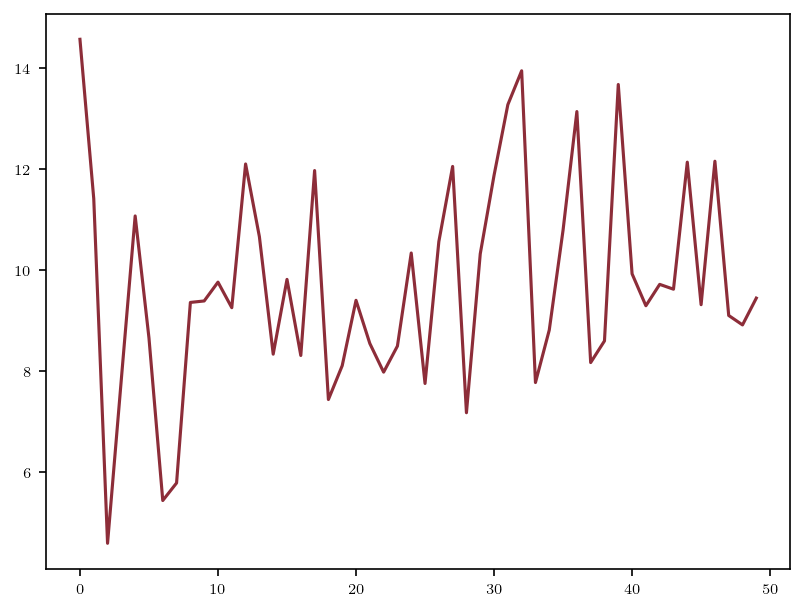

In [25]:
plt.plot(np.sum(dy_dx_per_input_reshaped, axis=0))

In [26]:
np.argmax(np.sum(dy_dx_per_input_reshaped, axis=0))

Array(0, dtype=int32)

In [8]:
import jax.numpy as np
cov_final = compute_cov(X_flat, Y_flat, X_unflattener, Y_unflattener, D, N, 5.33)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))

<Axes: >

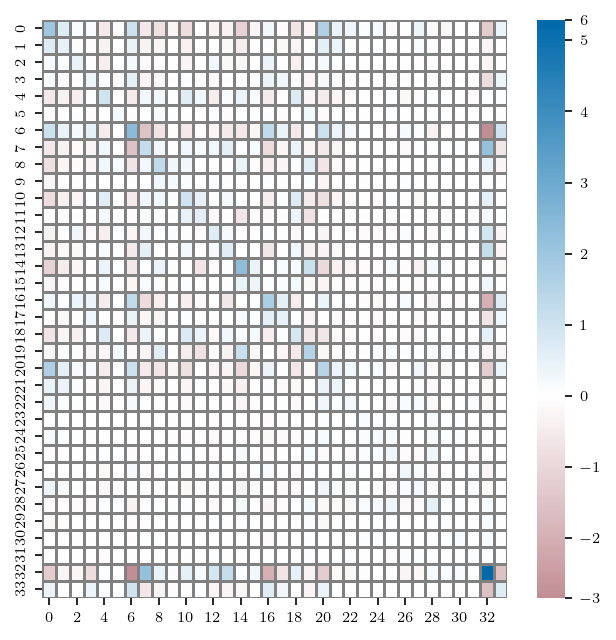

In [9]:
from utils import plot_heatmap
plot_heatmap(cov_final)

In [10]:
from utils import equipotential_standard_normal_within_one_std

S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)

In [11]:
print(samples.shape)

(34, 20)


In [12]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
from matplotlib import colors
import numpy as np

def animate(samples, labels_time, labels_type, output, cmap):
    plt.rcParams['axes.grid'] = False

    num_samples = samples.shape[0] // 2  # Since x and y are interleaved

    # Encode time labels for color mapping
    unique_times = np.unique(labels_time)
    #cmap = plt.get_cmap(cmap)
    #norm = colors.Normalize(vmin=0, vmax=len(unique_times)-1)
    color_mapping = {label: cmap[i] for i, label in enumerate(unique_times)}

    # Assign markers dynamically to types
    marker_list = ['o', 's', '^', 'D', '*', 'P', 'x', 'v', 'p', 'H']
    unique_types = np.unique(labels_type)
    marker_mapping = {t: m for t, m in zip(unique_types, itertools.cycle(marker_list))}

    fig, ax = plt.subplots(figsize=(7, 5))

    # Reshape samples into (num_samples, 2, num_frames) -> (x, y) pairs for each sample over time
    samples_reshaped = samples.reshape(num_samples, 2, -1)

    # Set axis limits
    min_x, max_x = np.min(samples_reshaped[:, 0, :]), np.max(samples_reshaped[:, 0, :])
    min_y, max_y = np.min(samples_reshaped[:, 1, :]), np.max(samples_reshaped[:, 1, :])
    ax.set_xlim((min_x - 0.1 * (max_x - min_x), max_x + 0.1 * (max_x - min_x)))
    ax.set_ylim((min_y - 0.1 * (max_y - min_y), max_y + 0.1 * (max_y - min_y)))
    ax.set_xlabel('TSNE 1')
    ax.set_ylabel('TSNE 2')

    # Initialize scatter objects for each type with dummy data
    scatters = {
        t: ax.scatter(
            np.zeros(num_samples), np.zeros(num_samples),  # Dummy coordinates
            label=f"Type: {t}", marker=marker_mapping[t]
        ) 
        for t in unique_types
    }

    # Add the legend here
    legend_patches = [
        plt.Line2D([0], [0], marker=marker_mapping[t], color='w', markerfacecolor='black', markersize=8, label=f"Type: {t}")
        for t in unique_types
    ]
    time_patches = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[t], markersize=8, label=f"Time: {t}")
        for t in unique_times
    ]
    ax.legend(handles=legend_patches + time_patches, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.tight_layout()

    # Initialize function for animation
    def init():
        for scatter in scatters.values():
            scatter.set_offsets(np.c_[np.zeros(num_samples), np.zeros(num_samples)])  # Dummy data
        return scatters.values()

    # Animation update function
    def update(frame):
        x_frame = samples_reshaped[:, 0, frame]  # X-coordinates for current frame
        y_frame = samples_reshaped[:, 1, frame]  # Y-coordinates for current frame

        for t in unique_types:
            indices = np.where(np.array(labels_type) == t)[0]  # Get indices for current type
            if len(indices) > 0:
                scatters[t].set_offsets(np.c_[x_frame[indices], y_frame[indices]])  # Update positions
                scatters[t].set_color([color_mapping[labels_time[j]] for j in indices])  # Update colors

        return scatters.values()

    # Create animation
    anim = FuncAnimation(fig, update, frames=samples.shape[1], init_func=init, interval=1000, blit=False)

    # Save animation
    anim.save(output, dpi=150, writer=PillowWriter(fps=5))

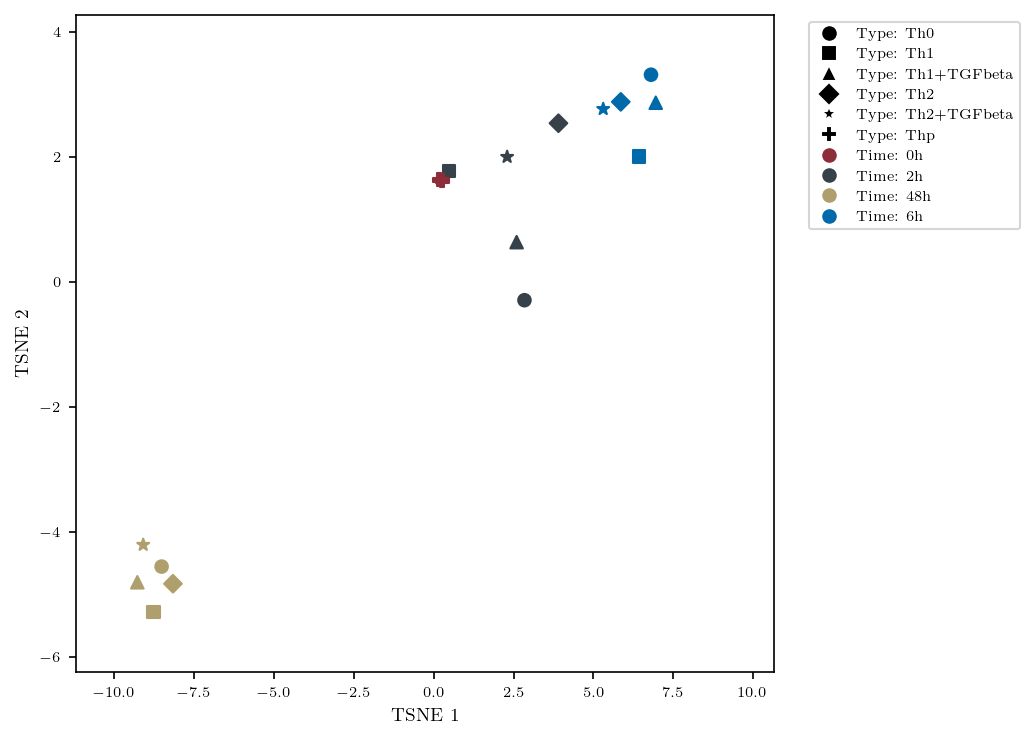

In [13]:
#from animate_ifd import *
animate(samples, labels_time, labels_type, wd + '/datasets/Thcells/animation.gif', cmap=palettes.tue_plot)

(34, 20)


Text(0, 0.5, 'TSNE 2')

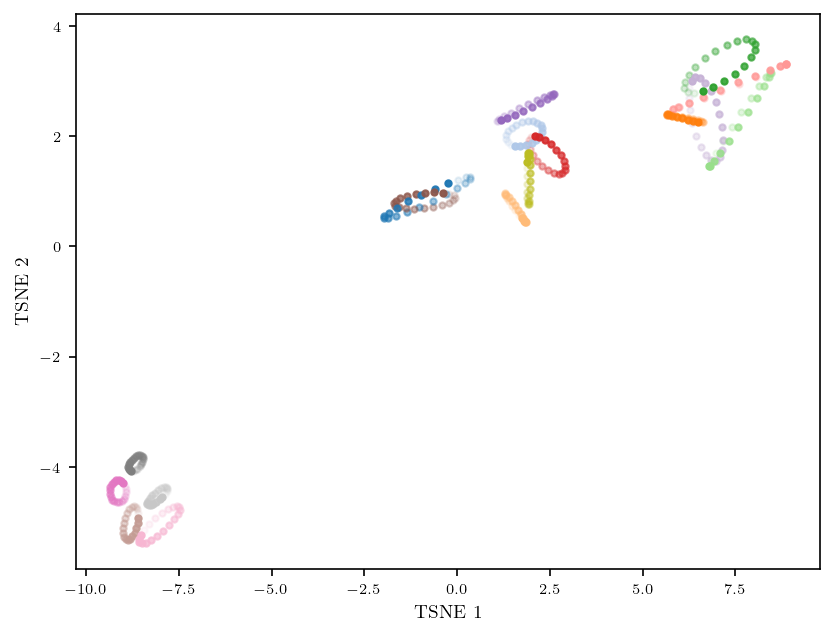

In [14]:
import matplotlib.pyplot as plt
# Get the tab20 colormap
tab20 = plt.get_cmap('tab20')

# Extract colors as a list of RGB tuples
colors = [tab20(i) for i in range(tab20.N)]

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure()
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

In [15]:
pritn

NameError: name 'pritn' is not defined

(100, 34)


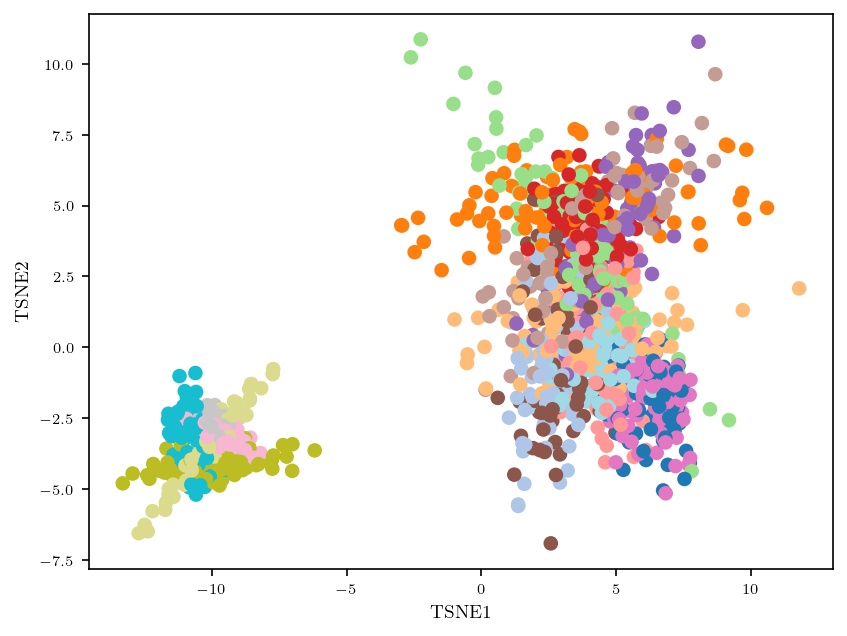

In [ ]:
draw_and_plot_samples(Y_flat, Y_unflattener, cov_final, 100, 'tnse_distr.pdf', cmap='tab20')

In [ ]:
print(cov1.shape, cov2.shape)

(17, 17) (50, 50)


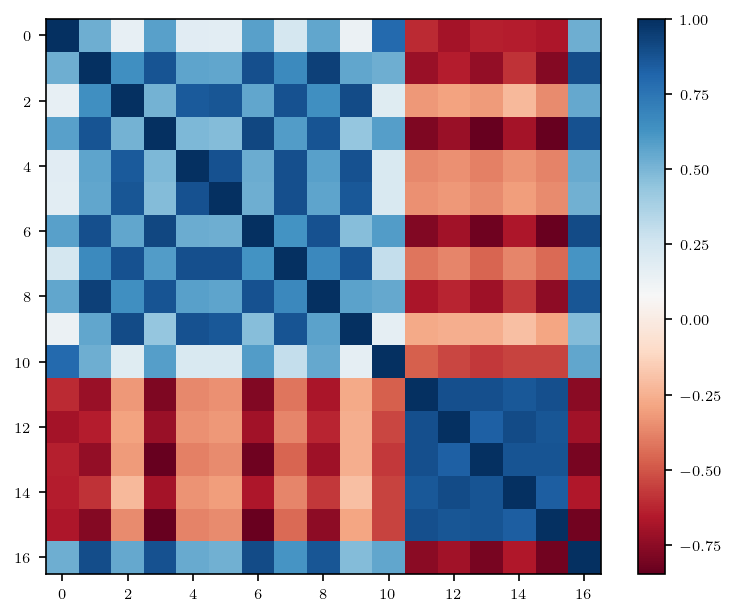

In [ ]:
f = plt.figure()
plt.imshow(cov1, cmap='RdBu')
plt.colorbar()


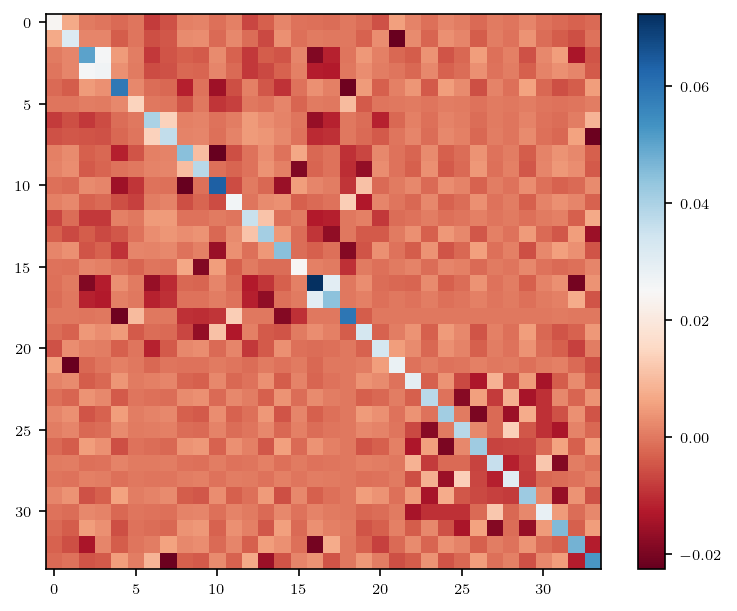

In [ ]:
f = plt.figure()
plt.imshow(H, cmap='RdBu')
plt.colorbar()

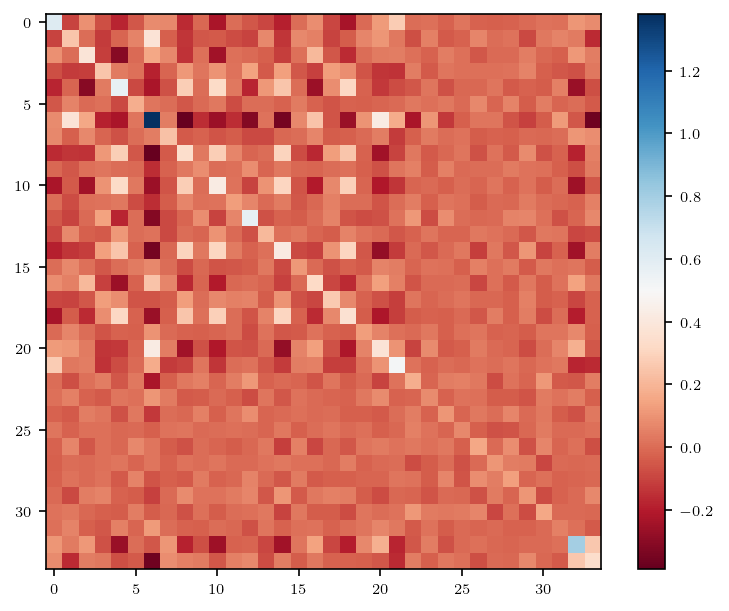

In [ ]:
f = plt.figure()
plt.imshow(cov_final, cmap='RdBu')
plt.colorbar()

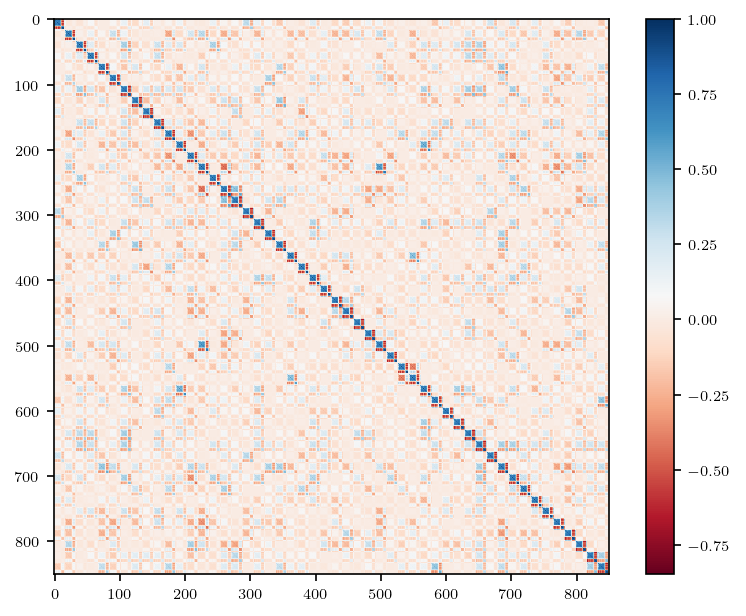

In [ ]:
f = plt.figure()
plt.imshow(np.kron(cov2.values, cov1.values), cmap='RdBu')
plt.colorbar()

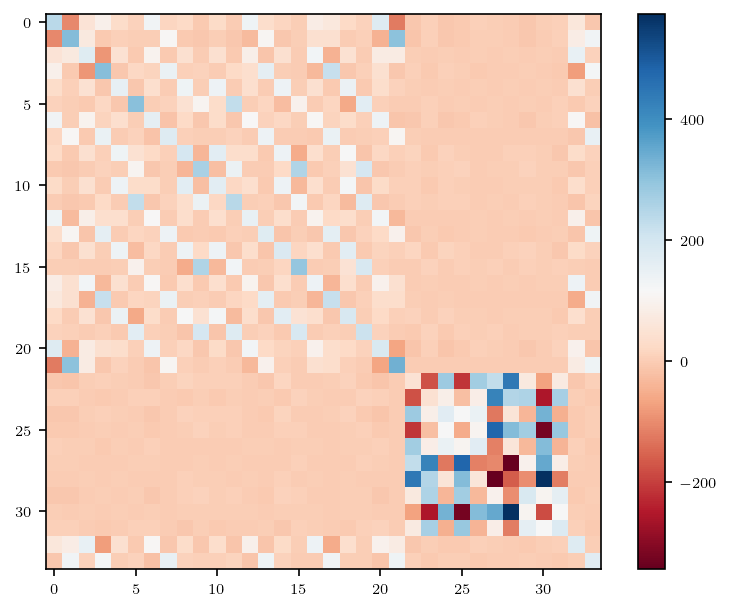

In [ ]:
f = plt.figure()
plt.imshow(H_pinv, cmap='RdBu')
plt.colorbar()

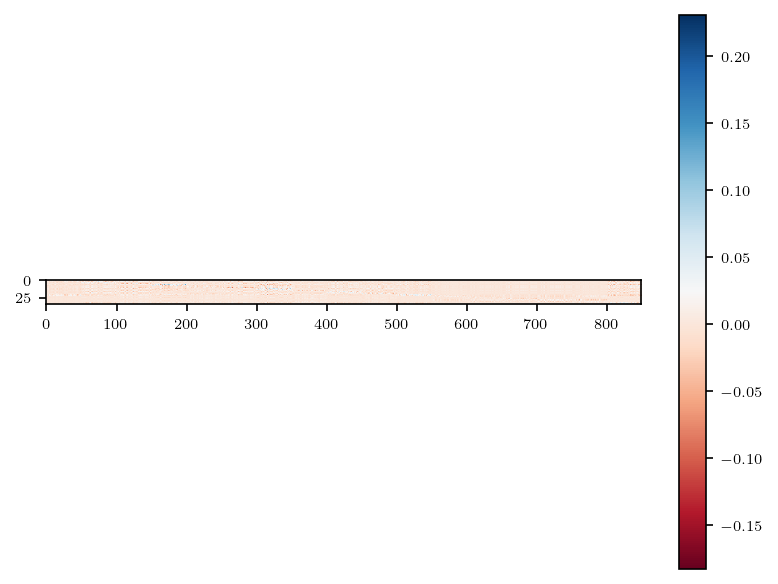

In [ ]:
f = plt.figure()
plt.imshow(dy_dx, cmap='RdBu')
plt.colorbar()